# Detecting U.S. Road Signs 
## A Deep Learning Model Comparison 

In [1]:
import numpy as np
import cv2
from IPython.display import Image
import pandas as pd
from matplotlib import pyplot as plt
from pylab import *
import glob, os
from pathlib import Path

## PyTorch-YOLOv3 Detection Outputs
### Model is originally from: https://github.com/eriklindernoren/PyTorch-YOLOv3
We trained this model for 45 epochs with a batch size of 8 with each epoch taking approximately 5-10 minutes to complete on an AWS SageMaker instance with a ml.p2.8xlarge GPU. 

The architecture uses Darknet-53 backbone.

Overal this model does a good job of detecting signs, it makes some mistakes on the more similar looking signs and on the classes where we had less images to train and test such as the keepRight class. Although we set the confidence threshold to 0.8 some of the predictions, often those that are not at a actual sign location, were below 0.5, but for an unknown reason were still displayed.

C:\Users\darkn\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:20: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


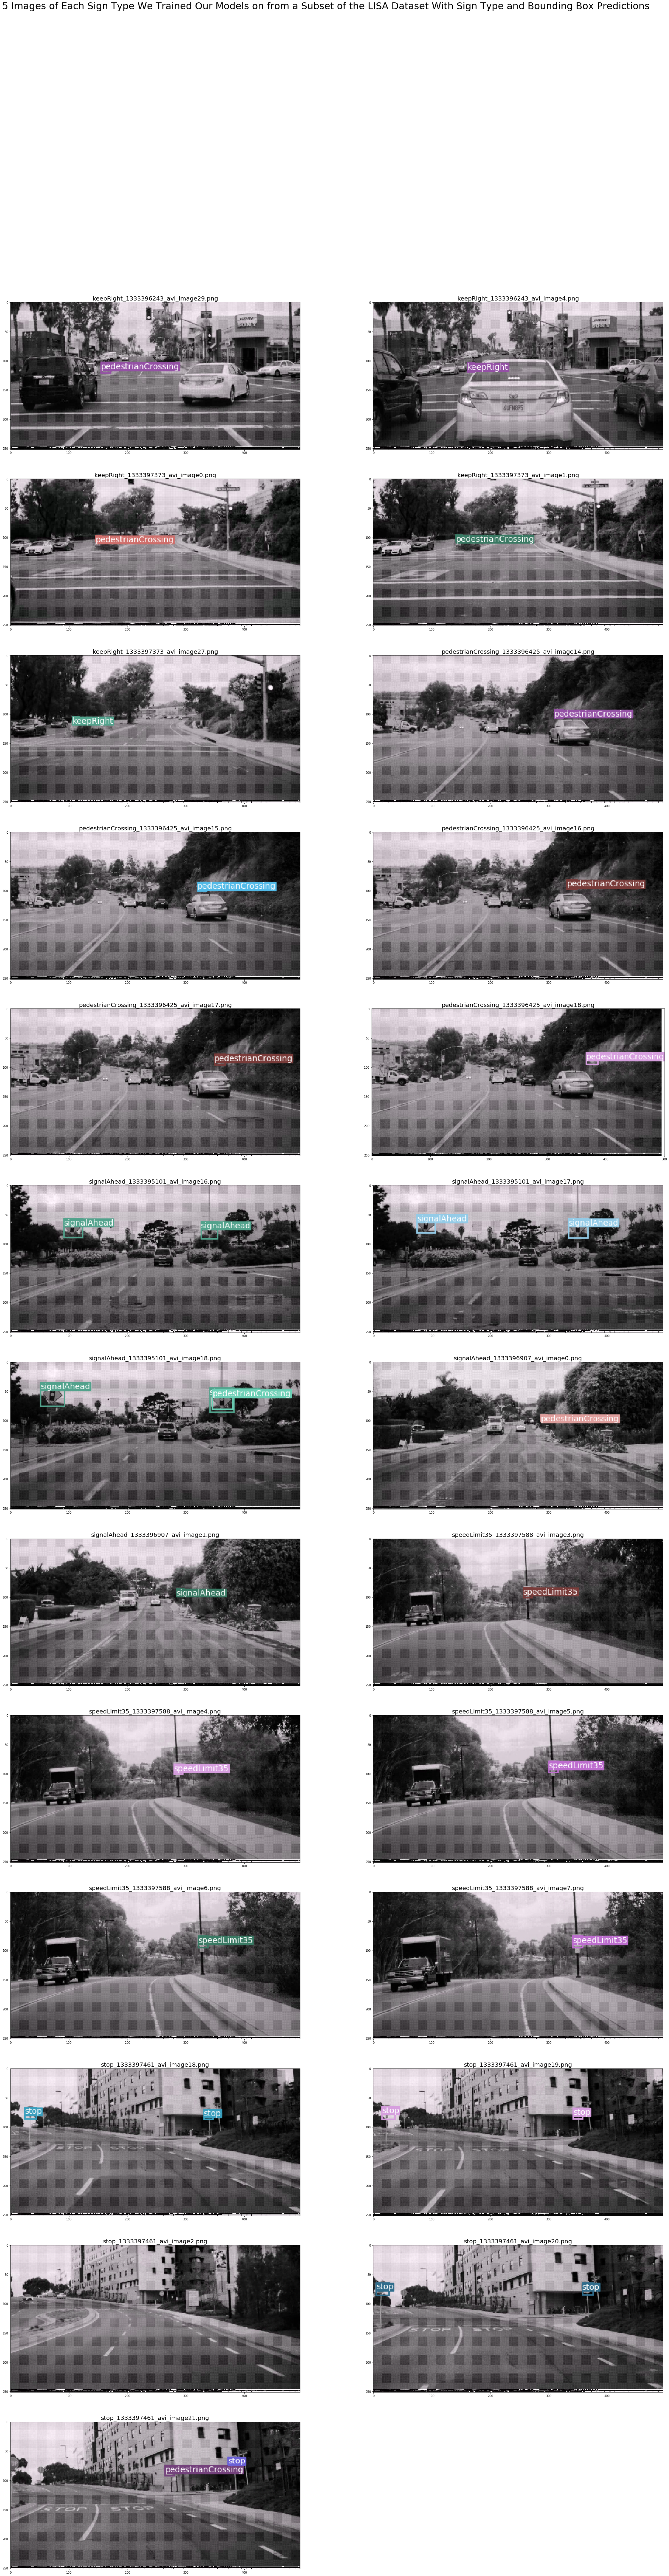

In [17]:
os.chdir("../PyTorch-YOLOv3_output_images_2")

path = Path("../PyTorch-YOLOv3_output_images_2")

fig = plt.figure(1,(40,140))

i=0
j=0
for file in glob.glob("*.png"):
    if (i < 4 or i==10) or (i > 19 and i < 25) or ((i > 126 and i < 130) or (i > 132 and i < 135)) or (i > 184 and i < 190) or (i > 220 and i < 226):
        plt.subplot(13,2,j+1)
        imageToShow=cv2.imread(str(path/file))
        plt.imshow(imageToShow)
        plt.title(file, fontsize=20)
        j = j+1
    i = i+1

#displaying it
fig.suptitle('5 Images of Each Sign Type We Trained Our Models on from a Subset of the LISA Dataset With Sign Type and Bounding Box Predictions', fontsize=32)
fig.show()

## Worst Predictions with PyTorch-YOLOv3
1. This model performs particularly poor on the Keep Right class of signs, we believe this is because we had a limited number of images for the Keep Right class in the subset of images we used for the training and test set

2. This model sometimes predicts Signal Ahead signs when it is a Pedestrian Crossing sign and vice versa, we believe this is due to the similar shape of signs and the model not being able to determine the symbol on the sign when at further distances

3. This model sometimes predicts signs in locations where no signs exists, we believe this is do to coincidental shapes of other objects in the image and a lower confidence threshold.

C:\Users\darkn\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:22: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


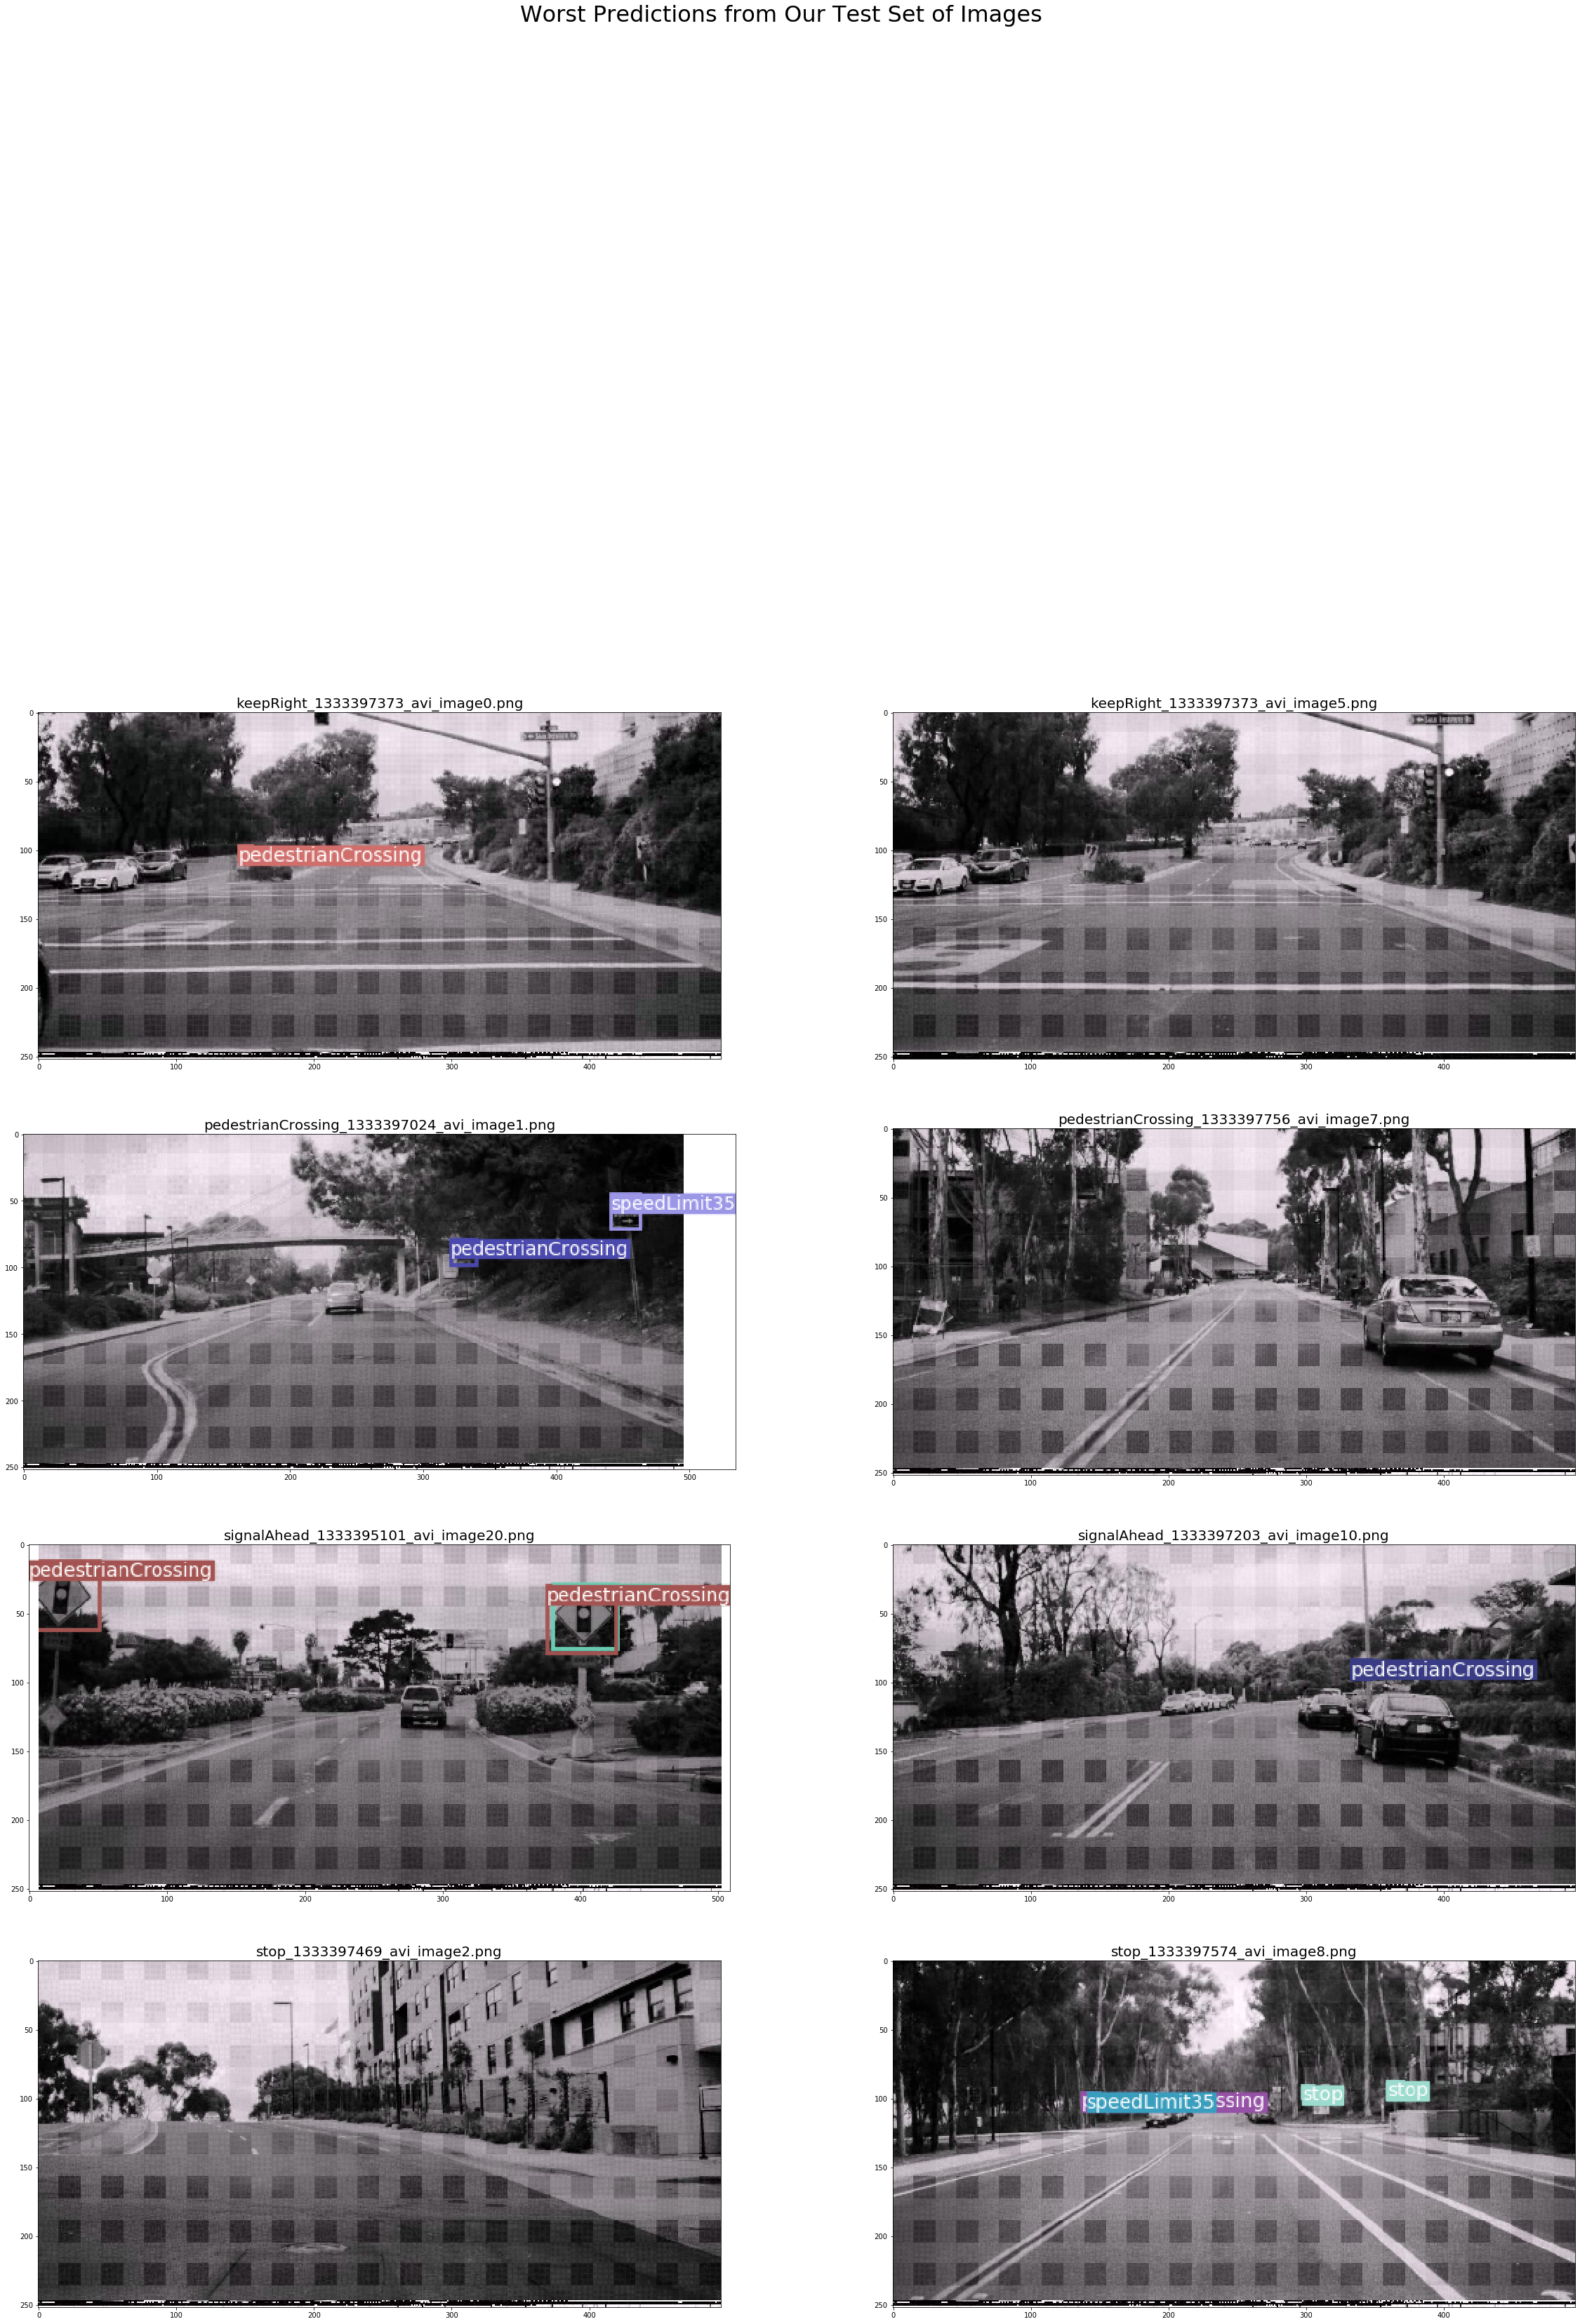

In [26]:
path = Path("../PyTorch-YOLOv3_output_images_2")

fig = plt.figure(1,(40,140))

i=0
j=0
for file in glob.glob("*.png"):
    #if file in ['stop_1333397736_avi_image14.png', 'stop_1333397461_avi_image1.png', 'signalAhead_1333397203_avi_image8.png',
    #            'pedestrianCrossing_1333397019_avi_image2.png', 'keepRight_1333397373_avi_image0.png', 'stop_1333397469_avi_image2.png']:
    if file in ['pedestrianCrossing_1333397756_avi_image7.png', 'pedestrianCrossing_1333397024_avi_image1.png', 'signalAhead_1333397203_avi_image10.png',
                'keepRight_1333397373_avi_image5.png', 'keepRight_1333397373_avi_image0.png', 'stop_1333397469_avi_image2.png',
                'signalAhead_1333395101_avi_image20.png', 'stop_1333397574_avi_image8.png']:
        plt.subplot(13,2,j+1)
        imageToShow=cv2.imread(str(path/file))
        plt.imshow(imageToShow)
        plt.title(file, fontsize=20)
        j = j+1
    i = i+1

#displaying it
fig.suptitle('Worst Predictions from Our Test Set of Images', fontsize=32)
fig.show()

The results from this model are pretty good, the main issues that are seen in this model and with the subset of data we had available are:

1. The keepRight class did not have enough images to allow the model to distinguish the from other signs
2. The model makes the mistake of predicting signs where they do not exist.
3. The two most similar signs pedestrianCrossing and signalAhead are mistaken for the other at further distances when the symbol is harder to detect

## PyTorch-YOLOv3 Metrics from training/validation data
The results of the training show some of these issues, we had a lower number of keepRight and speedLimit35 signs and the much lower and much higher APs reflect this.

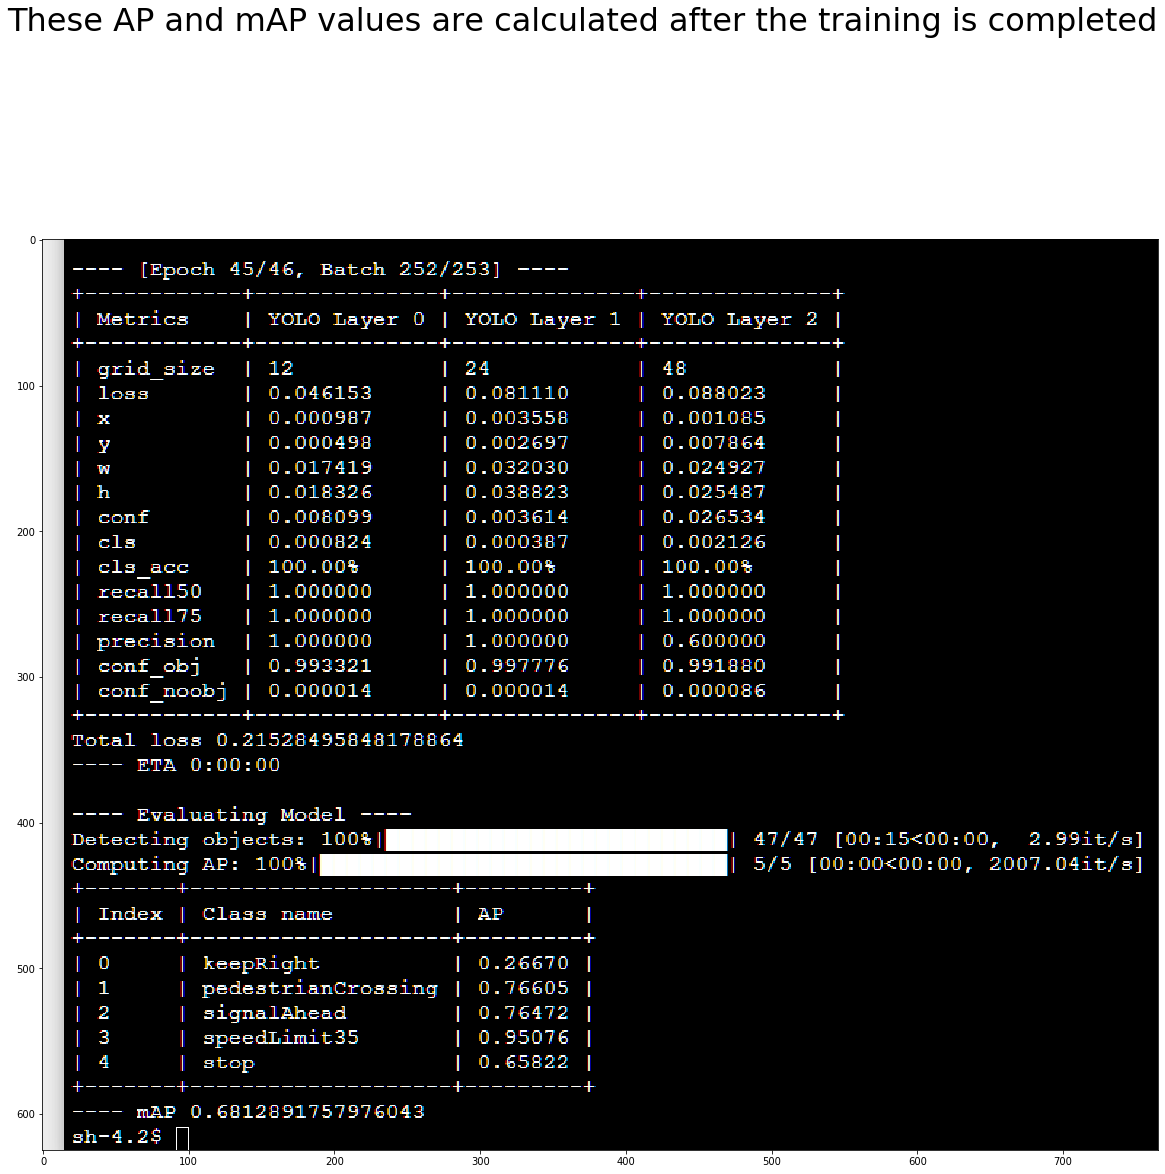

In [35]:
path = Path("../PyTorch_YOLOv3_mAP_AP")

fig = plt.figure(1,(20,20))

ImageToShow = cv2.imread(str(path/"mAP_AP_image.png"))

plt.imshow(ImageToShow)
plt.suptitle('These AP and mAP values are calculated after the training is completed', fontsize=32)
plt.show()

## PyTorch-YOLOv3 Metrics from test data 
### This information was calculated by hand (looking through the output images)
keepRight accuracy: 0.1053 (2 out of 19)

pedestrianCrossing accuracy: 0.8519 (92 out of 108 images)

signalAhead accuracy: 0.5556 (30 out of 54 images)

speedLimit accuracy: 1.0 (11 out of 11)

stop accuracy: 0.625 (85 out of 136)

Overall accuracy: 0.6707 (220 out of 328)

# PyTorch-YOLOv3 Summary
We originally ran training for 20 epochs with a batch size of 8 and the performance was significantly worse.

We believe that if we had more of each sign type or if we were able to run training for more epochs we could improve the overall accuracy of the model.

***

## SingleShotDetector (SSD)
### Original notebook from: https://github.com/rohitgeo/singleshotdetector

The SSD model was trained with a batch size of 64 for 30 epochs with each epoch taking approximately 21 seconds to complete. 

The architecture is based off of the Resnet34 model.

### Some Decent Results
With the ground truth being displayed on the left and predictions displayed on the right, results look not too bad!

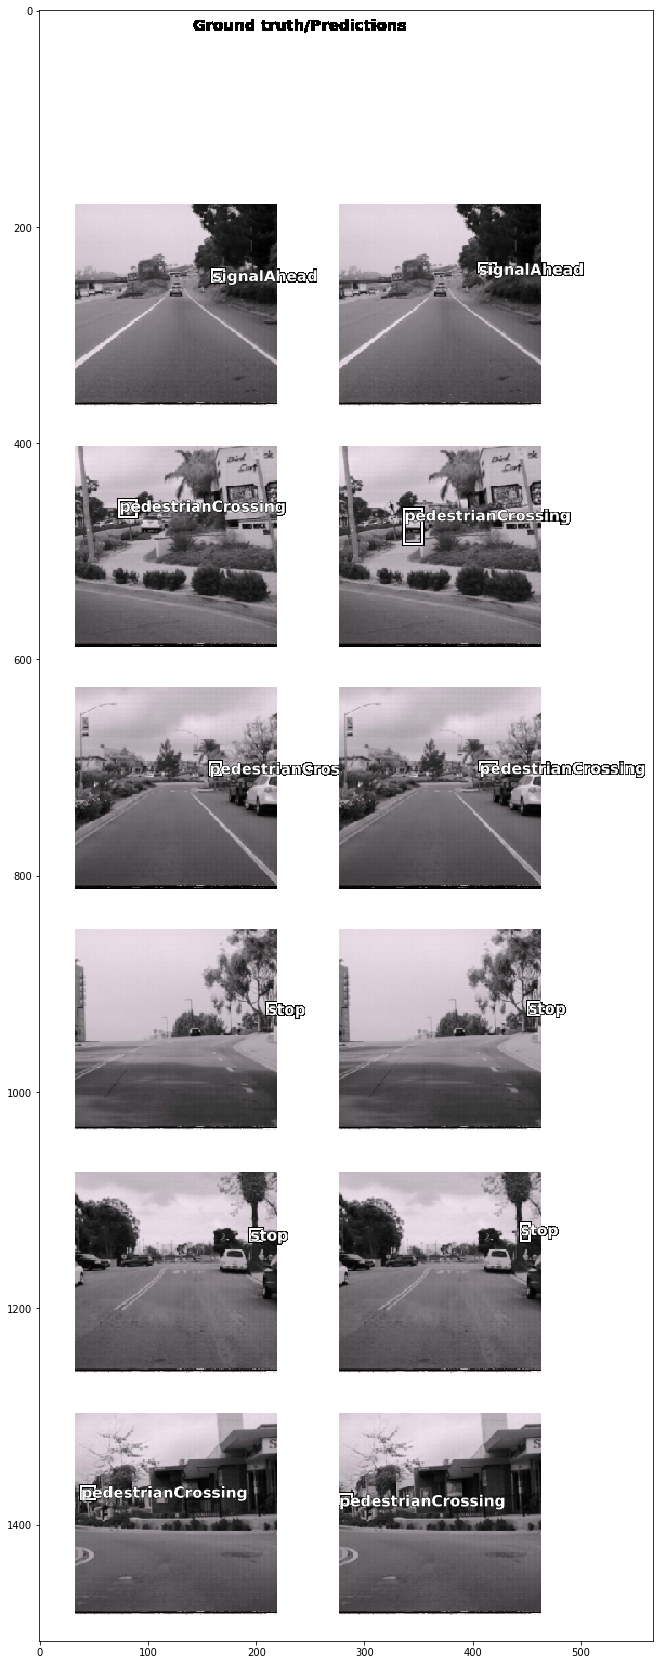

In [36]:
path = Path("../SSDOutputImages")

fig = plt.figure(1,(30,30))

ImageToShow = cv2.imread(str(path/"ShowResults.png"))

plt.imshow(ImageToShow)

### Although results seem decent, not all examples hit it on the head
No false positives which is a good *sign*, but false negatives seem to be an issue.

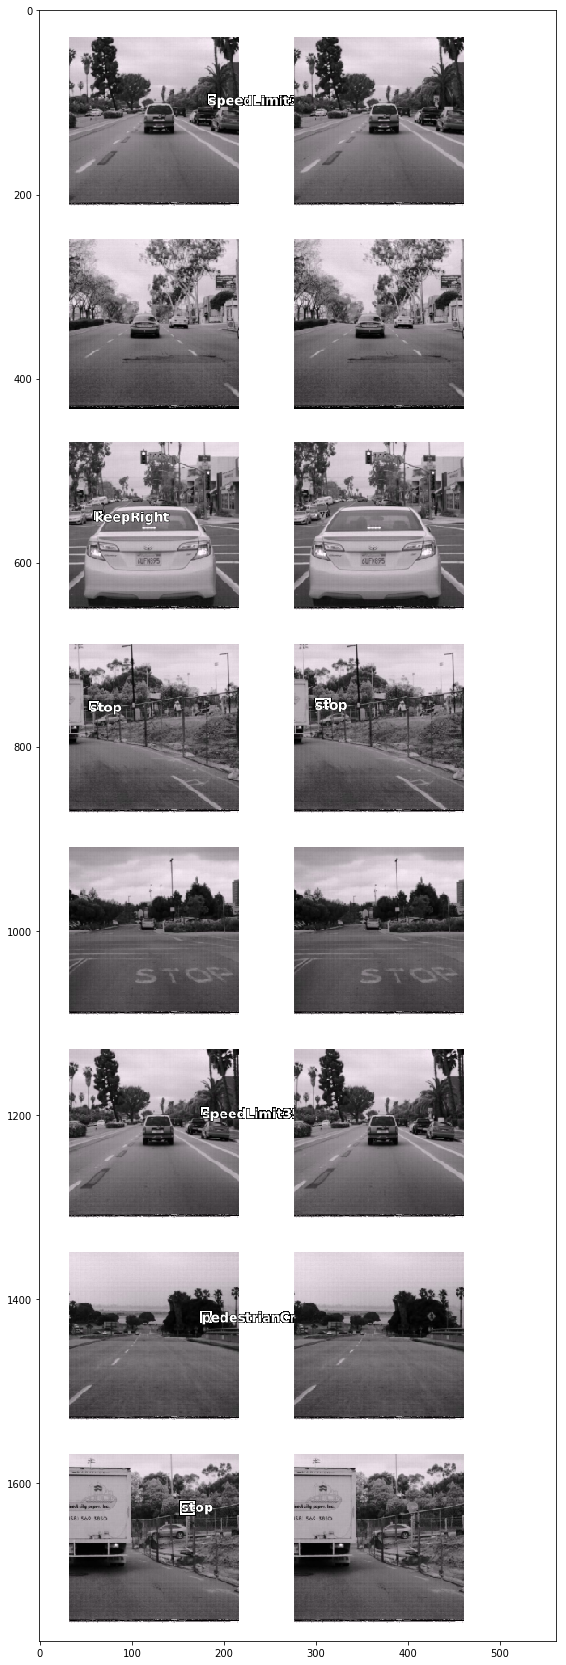

In [37]:
path = Path("../SSDOutputImages")

fig = plt.figure(1,(30,30))

ImageToShow = cv2.imread(str(path/"BadResults.png"))

plt.imshow(ImageToShow)

### SSD Summary

Clarity of images may be having an impact on the model's ability to see the signs in the images.

One of the biggest drawbacks of this model is the difficulty of measuring performance. More work on the model will be needed to show these kinds of metrics.

The model itself is not the fastest nor the slowest to train so gets no bonus points for speed.

Overall, it seems the model performs fairly well, though much more work is needed before being able to use this on the road.

***